In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('output_data/melted.csv', index_col=0)

In [51]:
df.pageviews = pd.to_numeric(df.pageviews)

# EDA

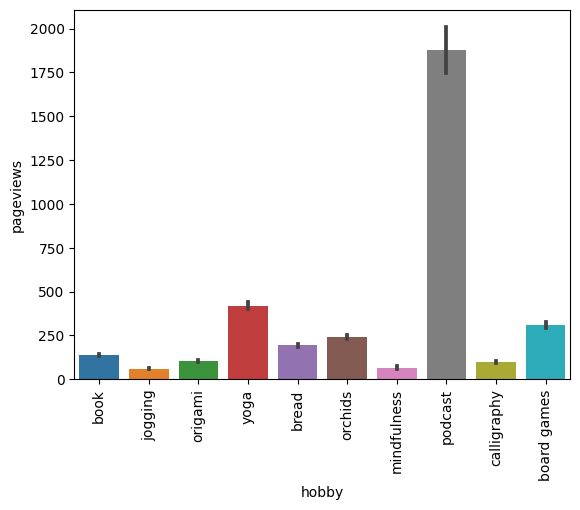

In [52]:
sns.barplot(x="hobby", y="pageviews", data=df)
_ = plt.xticks(rotation=90)
plt.show()

------------------------------

# Stay Home Requirements

Only look at the stay_home_requirements and after_lockdown_start for now.

In [53]:
df_cleaned = pd.read_csv('output_data/cleaned.csv')

In [54]:
df_cleaned = df_cleaned.dropna(axis=1)
df_cleaned = df_cleaned.set_index(df_cleaned.date).drop(columns="date")
df_cleaned.head()

,book,jogging,origami,yoga,bread,orchids,mindfulness,podcast,calligraphy,board games,language,stay_home_requirements,after_lockdown_start,stringency_index
date,,,,,,,,,,,,,,
2020-01-01,159,69,135,718,191,282,0,1943,133,1667,German (DEU),0,0,0.0
2020-01-01,11,0,6,80,1,3,1,2,1,2,Tamil,0,0,0.0
2020-01-01,33,22,10,33,43,52,17,33,52,26,Vietnamese,0,0,0.0
2020-01-01,2,7,4,8,15,8,5,18,6,159,Serbian,0,0,0.0
2020-01-01,90,50,133,233,177,123,209,183,201,164,Japanese,0,0,0.0


Only select the rows where after the first lockdown the stay_home_requirements are not zero, as later values for this column could produce noise.

<AxesSubplot: >

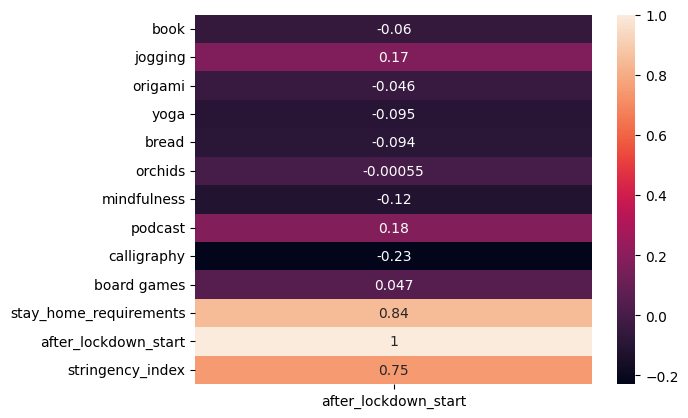

In [55]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stay_home_requirements"] > 0)].corr()[['after_lockdown_start']], annot=True)

<AxesSubplot: >

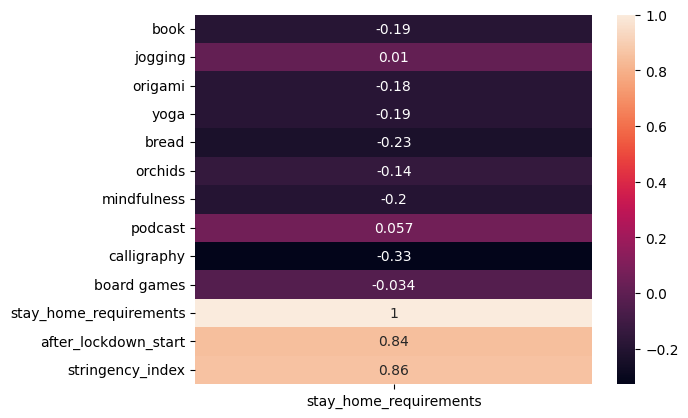

In [56]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stay_home_requirements"] > 0)].corr()[['stay_home_requirements']], annot=True)

Correlation with stay_home_requirements.

<AxesSubplot: >

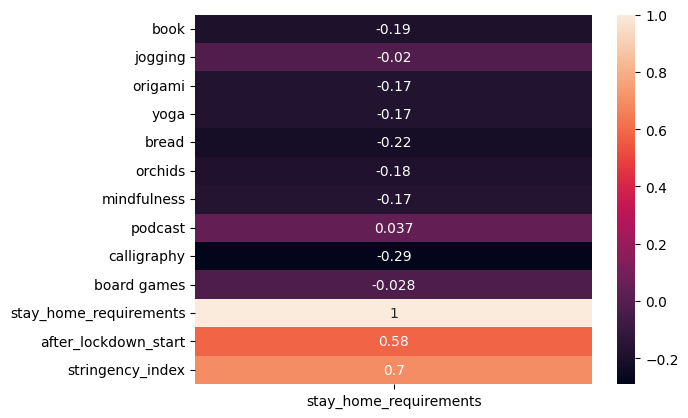

In [57]:
sns.heatmap(df_cleaned.corr()[['stay_home_requirements']], annot=True)

------------------------------

# Stringency Index

Look at the correlation between stringency index and pageviews.

First, only select the rows where after the first lockdown the stay_home_requirements are not zero, as later values for this column could produce noise.

<AxesSubplot: >

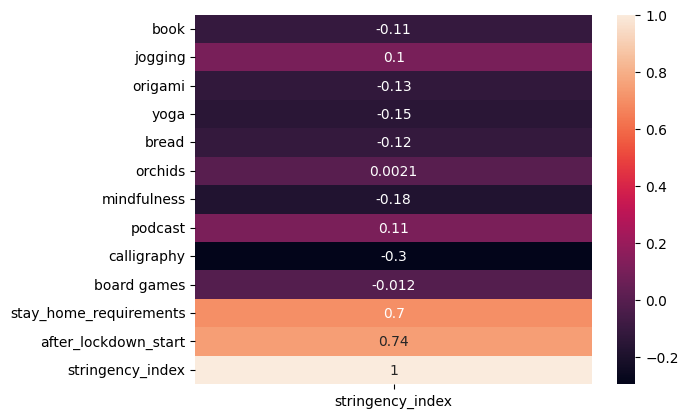

In [58]:
sns.heatmap(df_cleaned[(df_cleaned["after_lockdown_start"] == 0) | (df_cleaned["stringency_index"] > 0)].corr()[['stringency_index']], annot=True)

Then, look at the correlation across all values.

<AxesSubplot: >

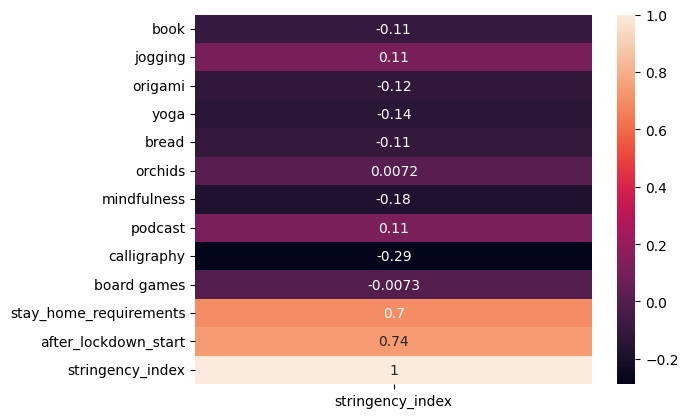

In [59]:
sns.heatmap(df_cleaned.corr()[['stringency_index']], annot=True)

------------------------------

# Weekly views

Keep only one "German" (DEU), and the pageviews/hobby columns, because we are currently not looking at lockdown restrictions.

In [60]:
df_views = df.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stay_home_requirements", "after_lockdown_start"])
df_views.reset_index(inplace=True)

In [61]:
df_views = df_views[df_views['language'] != 'German (CHE)']
df_views = df_views[df_views['language'] != 'German (AUT)']
df_views['language'] = df_views['language'].replace(['German (DEU)'], 'German')

Average the pageviews over week to flatten the weekday-weekend developments and soften outliers.

In [62]:
df_weekly = df_views.copy()
df_weekly['date'] = pd.to_datetime(df_weekly['date']) - pd.to_timedelta(7, unit='d')
df_weekly = df_weekly.groupby(['hobby', 'language']).resample('W-Mon', on='date').mean().reset_index().sort_values('date')
df_weekly.date.unique()

array(['2019-12-30T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-02-03T00:00:00.000000000',
       '2020-02-10T00:00:00.000000000', '2020-02-17T00:00:00.000000000',
       '2020-02-24T00:00:00.000000000', '2020-03-02T00:00:00.000000000',
       '2020-03-09T00:00:00.000000000', '2020-03-16T00:00:00.000000000',
       '2020-03-23T00:00:00.000000000', '2020-03-30T00:00:00.000000000',
       '2020-04-06T00:00:00.000000000', '2020-04-13T00:00:00.000000000',
       '2020-04-20T00:00:00.000000000', '2020-04-27T00:00:00.000000000',
       '2020-05-04T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-05-25T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-15T00:00:00.000000000', '2020-06-22T00:00:00.000000000',
       '2020-06-29T00:00:00.000000000'], dtype='dat

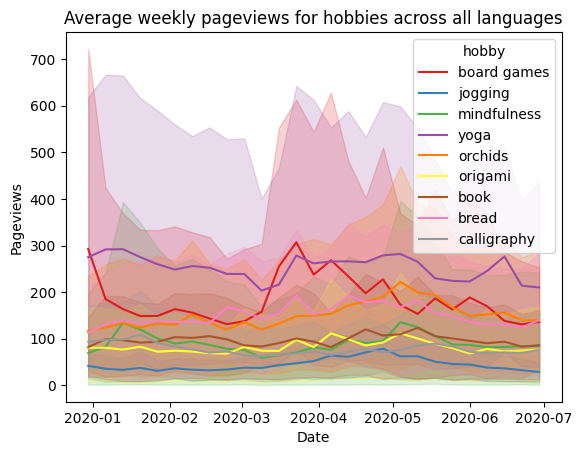

In [63]:
sns.set_palette('Set1')
ax = sns.lineplot(df_weekly[df_weekly['hobby'] != 'podcast'], x='date', y='pageviews', hue='hobby')
_ = ax.set(xlabel='Date', ylabel='Pageviews', title="Average weekly pageviews for hobbies across all languages")

------------------------------

# Zoom in on Hobbies

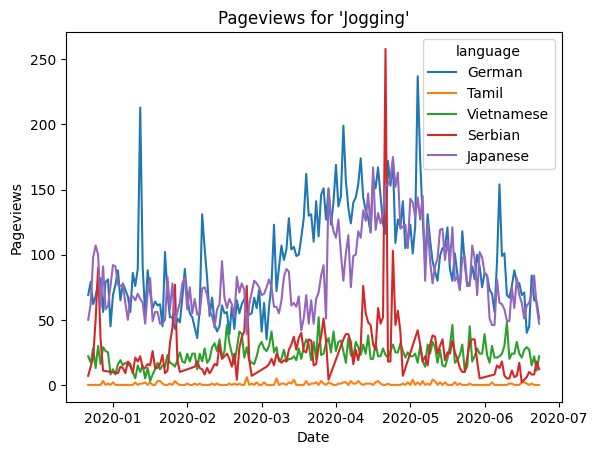

In [64]:
sns.set_palette('tab10')
df_zoom = df_views[df_views['hobby'] == 'jogging']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Jogging'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

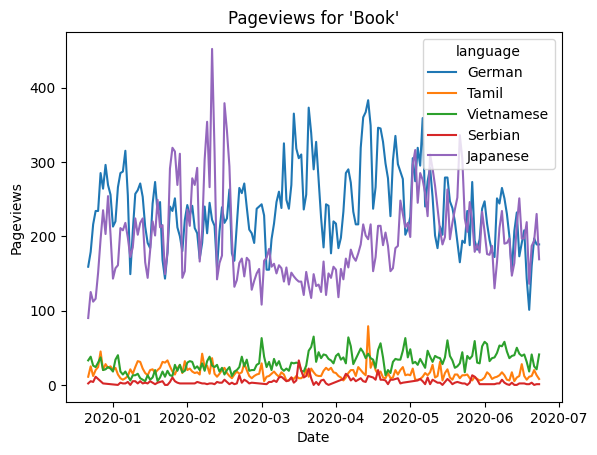

In [65]:
df_zoom = df_views[df_views['hobby'] == 'book']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Book'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

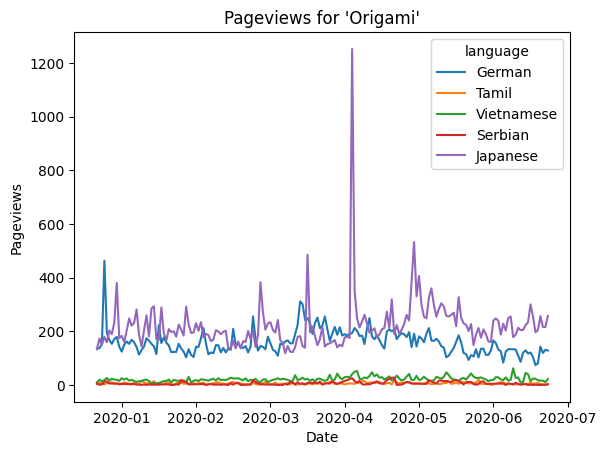

In [66]:
df_zoom = df_views[df_views['hobby'] == 'origami']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Origami'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

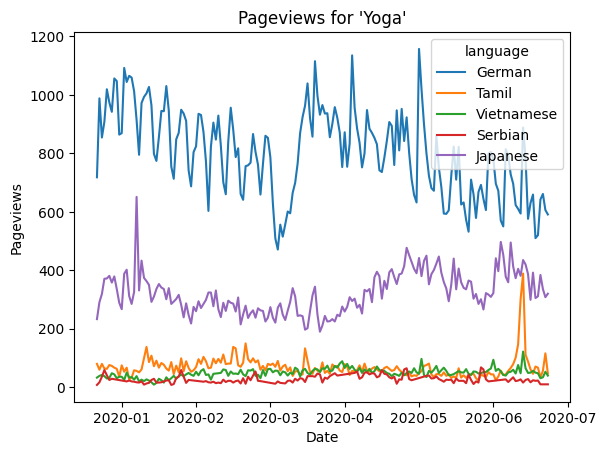

In [67]:
df_zoom = df_views[df_views['hobby'] == 'yoga']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Yoga'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

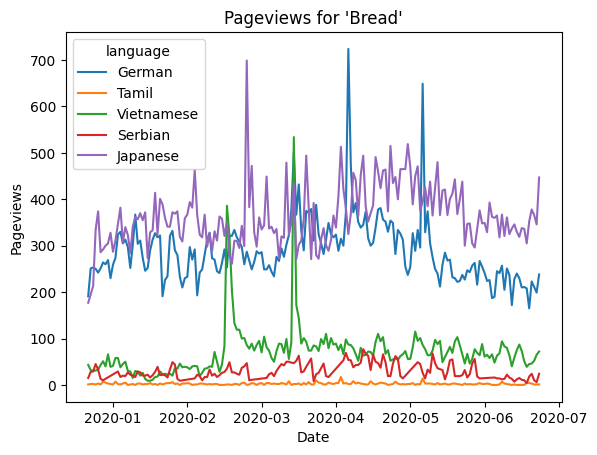

In [68]:
df_zoom = df_views[df_views['hobby'] == 'bread']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Bread'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

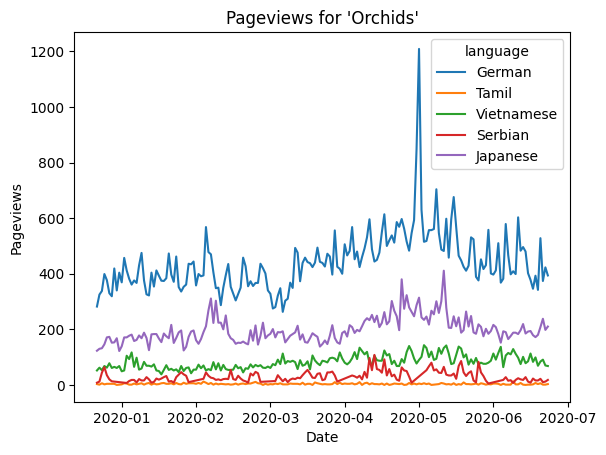

In [69]:
df_zoom = df_views[df_views['hobby'] == 'orchids']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Orchids'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

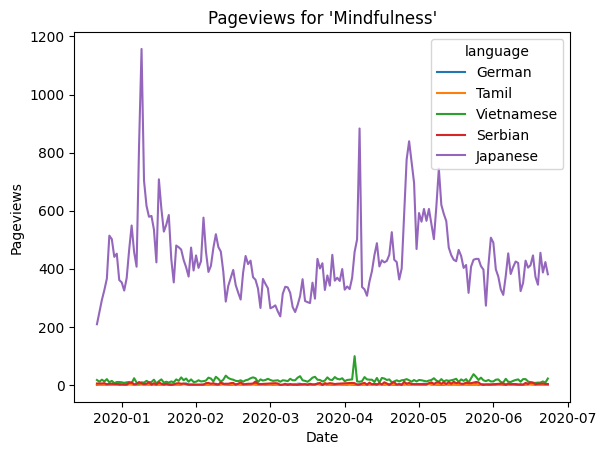

In [70]:
df_zoom = df_views[df_views['hobby'] == 'mindfulness']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Mindfulness'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

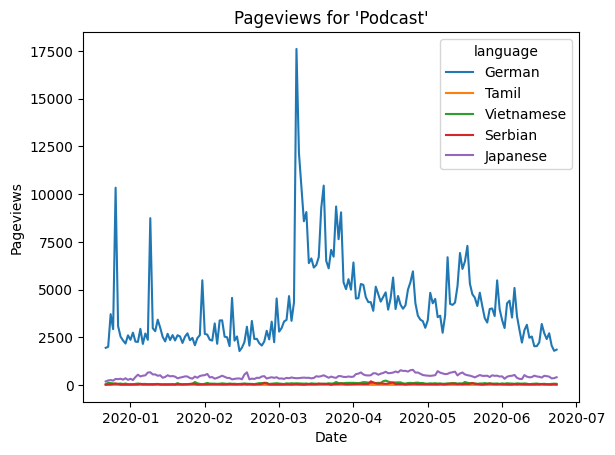

In [71]:
df_zoom = df_views[df_views['hobby'] == 'podcast']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Podcast'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

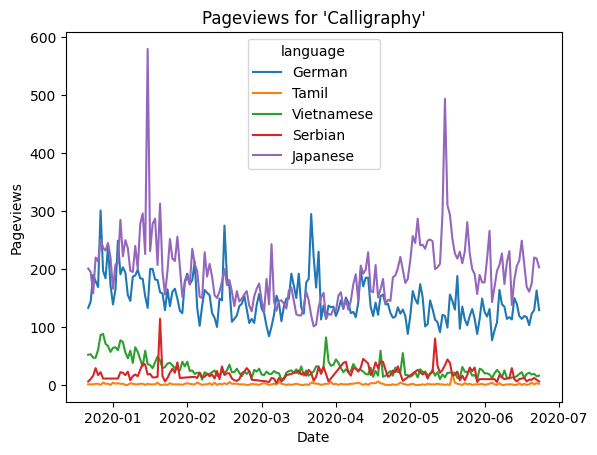

In [72]:
df_zoom = df_views[df_views['hobby'] == 'calligraphy']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Calligraphy'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

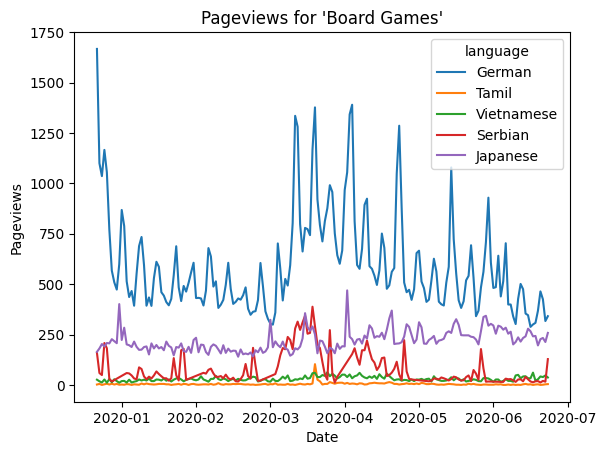

In [73]:
df_zoom = df_views[df_views['hobby'] == 'board games']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='language')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for 'Board Games'")
_ = plt.xticks([10,40,70,100,130,160,190], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06', '2020-07'])

------------------------------

# Zoom in on Languages

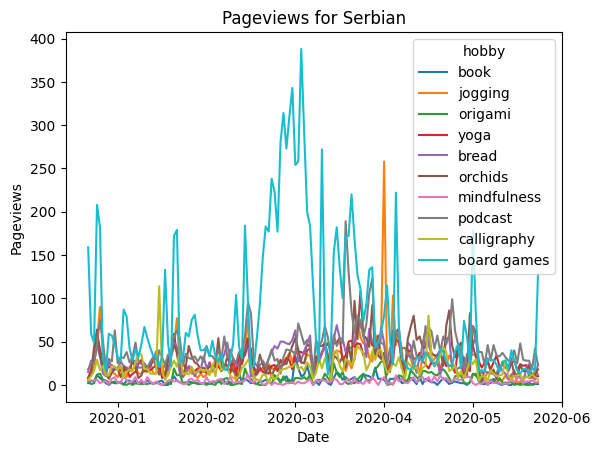

In [74]:
df_zoom = df_views[df_views['language'] == 'Serbian']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='hobby')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for Serbian")
_ = plt.xticks([10,40,70,100,130,160], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06'])

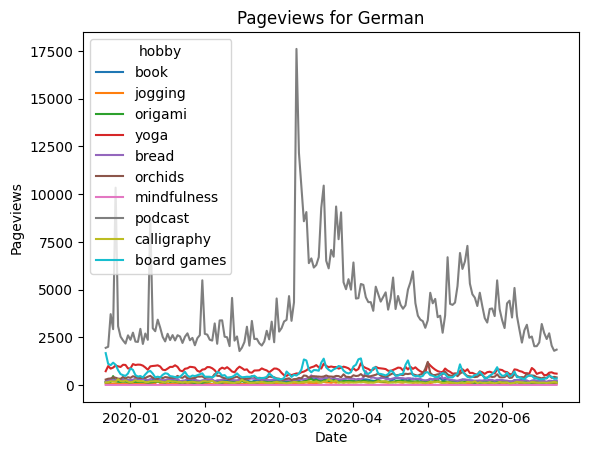

In [75]:
df_zoom = df_views[df_views['language'] == 'German']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='hobby')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for German")
_ = plt.xticks([10,40,70,100,130,160], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06'])

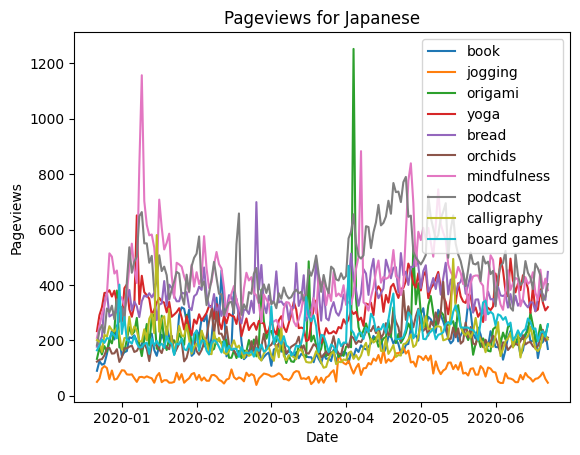

In [76]:
df_zoom = df_views[df_views['language'] == 'Japanese']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='hobby')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for Japanese")
plt.legend(loc='upper right')
_ = plt.xticks([10,40,70,100,130,160], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06'])

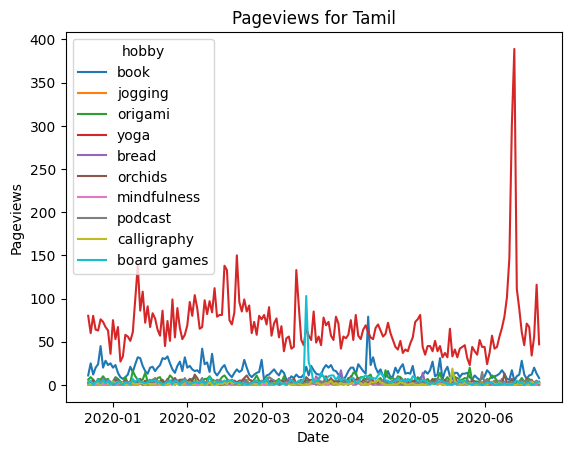

In [77]:
df_zoom = df_views[df_views['language'] == 'Tamil']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='hobby')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for Tamil")
_ = plt.xticks([10,40,70,100,130,160], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06'])

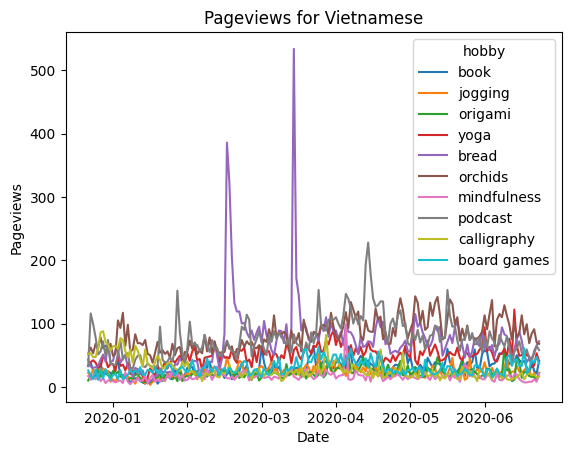

In [78]:
df_zoom = df_views[df_views['language'] == 'Vietnamese']
ax = sns.lineplot(df_zoom, x='date', y='pageviews', hue='hobby')
ax.set(xlabel='Date', ylabel='Pageviews', title="Pageviews for Vietnamese")
_ = plt.xticks([10,40,70,100,130,160], ['2020-01', '2020-02', '2020-03', '2020-04','2020-05', '2020-06'])

---------------------------

# Stay Home Requirements

In [79]:
sns.set_palette('tab10')

In [80]:
df_averaged_stay_home = df.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stringency_index", "after_lockdown_start"])
df_averaged_stay_home.reset_index(inplace=True)
df_averaged_stay_home['date'] = pd.to_datetime(df_averaged_stay_home['date']) - pd.to_timedelta(7, unit='d')
df_averaged_stay_home = df_averaged_stay_home.groupby(['hobby', 'stay_home_requirements']).mean().reset_index()

In [81]:
df_averaged_stay_home.head()

,hobby,stay_home_requirements,pageviews
0,board games,0,297.566396
1,board games,1,334.397590
2,board games,2,428.531429
3,board games,3,84.625000
4,book,0,148.822493


<AxesSubplot: xlabel='stay_home_requirements', ylabel='pageviews'>

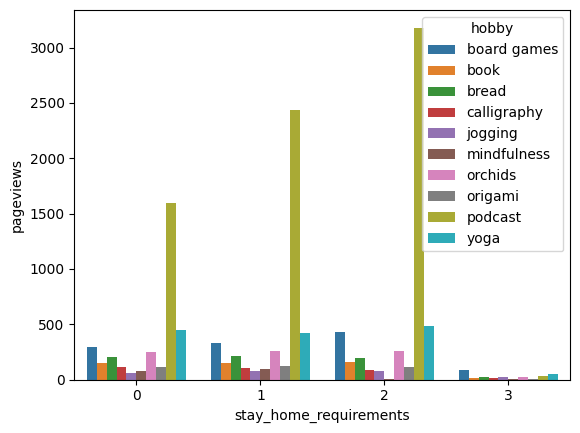

In [82]:
sns.barplot(df_averaged_stay_home, x='stay_home_requirements', y='pageviews', hue='hobby')

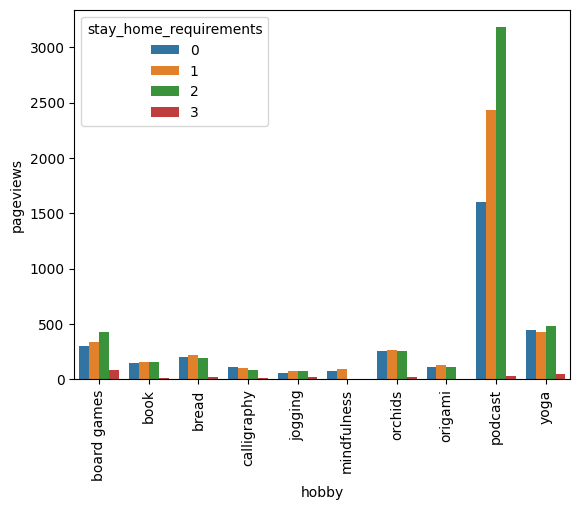

In [83]:
sns.barplot(df_averaged_stay_home, x='hobby', y='pageviews', hue='stay_home_requirements')
_ = plt.xticks(rotation=90)

<AxesSubplot: >

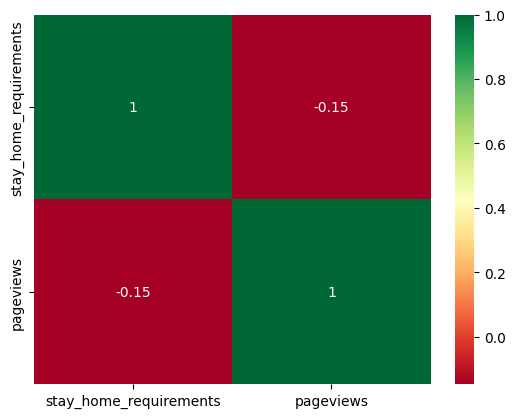

In [84]:
sns.heatmap(df_averaged_stay_home.corr(), annot=True, cmap='RdYlGn')

In [85]:
df[df['stay_home_requirements'] == 3]['language'].unique()

array(['Serbian', 'Tamil'], dtype=object)

See if correlation makes more sense when we exclude stay_home_requirements == 3:

<AxesSubplot: >

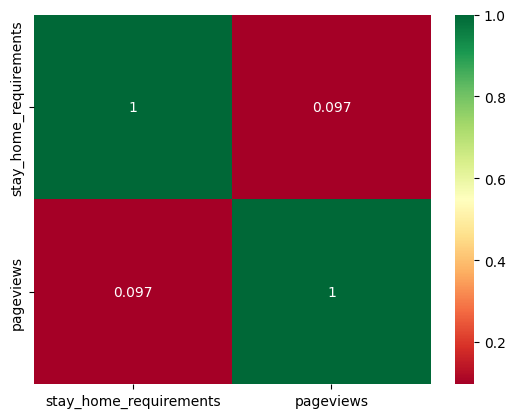

In [86]:
sns.heatmap(df_averaged_stay_home[df_averaged_stay_home['stay_home_requirements'] != 3].corr(), annot=True, cmap='RdYlGn')

Exclude the 0 values after lockdown start

In [87]:
df_after_lockdown_start =  df[(df["after_lockdown_start"] == 0) | (df["stay_home_requirements"] > 0)]

In [88]:
df_after_lockdown_start = df_after_lockdown_start.drop(columns=["all_day_bing_tiles_visited_relative_change", "all_day_ratio_single_tile_users", "stringency_index", "after_lockdown_start"])
df_after_lockdown_start.reset_index(inplace=True)
df_after_lockdown_start['date'] = pd.to_datetime(df_after_lockdown_start['date']) - pd.to_timedelta(7, unit='d')
df_after_lockdown_start = df_after_lockdown_start.groupby(['hobby', 'stay_home_requirements']).mean().reset_index()

<AxesSubplot: >

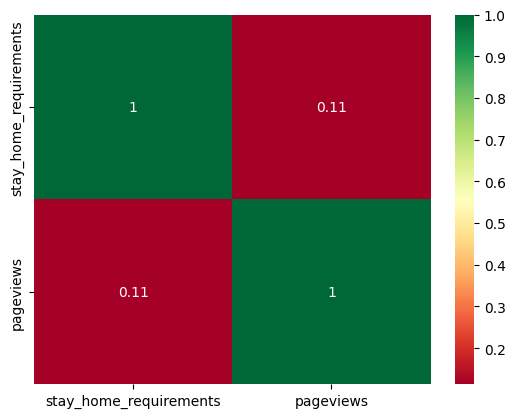

In [89]:
sns.heatmap(df_after_lockdown_start[df_after_lockdown_start['stay_home_requirements'] != 3].corr(), annot=True, cmap='RdYlGn')